## HW#1

### Question 1:

**a) Estimated Model**

In [1]:
# Coefficients from regression summary
intercept = 21700
coef_pop = 0.00224
coef_finance = 24200
coef_proftech = 30900
coef_ict = 64200
coef_mgmt = 195000

(intercept, coef_pop, coef_finance, coef_proftech, coef_ict, coef_mgmt)

# Format into a readable regression equation string
equation = (f"ŷ = {intercept} + "
            f"{coef_pop}·pop + "
            f"{coef_finance}·finance + "
            f"{coef_proftech}·prof.tech + "
            f"{coef_ict}·ict + "
            f"{coef_mgmt}·management")
equation

print(equation)

ŷ = 21700 + 0.00224·pop + 24200·finance + 30900·prof.tech + 64200·ict + 195000·management


**b) Residual Sum of Squares (RSS)**  

RSS = (7250)^2 \times 127 = 6{,}675{,}437{,}500

In [18]:
# Calculating the Residual Sum of Squares (RSS)

RSS = (7250**2) * 127
print(f"{RSS:,}")   

6,675,437,500


**c) Percentage of Variance Explained**  

In [21]:
R2 = 0.433
R2
f"{R2*100:.1f}%"

'43.3%'

**d) Relationship Between Variables**  

In [25]:
F_stat = 19.4
p_val = 2.54e-14

if p_val < 0.05:
    relation = "Yes, significant relationship"
else:
    relation = "No, not significant"

relation

'Yes, significant relationship'

This means there is a strong relationship between per-capita GMP and the predictors.  

- Significant predictors: pop, finance, ict, management  
- Not significant: prof.tech

**e) Predicted per-capita GMP for Pittsburgh**  

Given values:  
- pop = 2,361,000  
- finance = 0.2018  
- prof.tech = 0.0777  
- ict = 0.03434  
- management = 0.02946  

In [29]:
# Coefficients from regression summary
intercept = 2.17e4
coef_pop = 2.24e-03
coef_finance = 2.42e4
coef_proftech = 3.09e4
coef_ict = 6.42e4
coef_mgmt = 1.95e5
resid_se = 7250.0
df_resid = 127

# Pittsburgh values
pop = 2361000
finance = 0.2018
proftech = 0.0777
ict = 0.03434
mgmt = 0.02946

# Prediction
pcgmp_pred = (intercept
 + coef_pop * pop
 + coef_finance * finance
 + coef_proftech * proftech
 + coef_ict * ict
 + coef_mgmt * mgmt)
RSS = resid_se**2 * df_resid

# Print output
print("Pittsburgh prediction:", pcgmp_pred)
print("RSS:", RSS)

# Formatted output
print(f"Pittsburgh prediction: {pcgmp_pred:,.0f}")
print(f"RSS: {RSS:,.0f}")

Pittsburgh prediction: 42222.458
RSS: 6675437500.0
Pittsburgh prediction: 42,222
RSS: 6,675,437,500


### Question 2: (Exercise 10, Q3 from Textbook)

In [40]:
import pandas as pd

# Download Carseats dataset from ISLR GitHub repo
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv"
carseats = pd.read_csv(url, index_col=0)

In [41]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [39]:
carseats.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
400,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


**a)** Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

In [34]:
import pandas as pd
import statsmodels.formula.api as smf

# Load Carseats (ISLR dataset mirror)
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv"
carseats = pd.read_csv(url, index_col=0)

# Make sure qualitative variables are treated as categorical
carseats["Urban"] = carseats["Urban"].astype("category")
carseats["US"] = carseats["US"].astype("category")

model_a = smf.ols("Sales ~ Price + Urban + US", data=carseats).fit()
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 23 Sep 2025   Prob (F-statistic):           2.39e-23
Time:                        19:47:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**b)** Provide an interpretation of each coefficient in the model.

In [46]:
coef = model_a.params.round(3)
coefcoef = model_a.params.round(3)
coef

Intercept       13.043
Urban[T.Yes]    -0.022
US[T.Yes]        1.201
Price           -0.054
dtype: float64

- **Intercept:** Predicted Sales for a non-urban, non-US store when `Price = 0`.Its mostly a reference point.
- **UrbanYes:** Difference in Sales between Urban and non-Urban stores, holding other predictors fixed.  
- **USYes:** Difference in Sales between US and non-US stores, holding other predictors fixed.
- **Price:** Expected change in Sales for a one-unit increase in `Price`, holding `Urban` and `US` fixed. Typically negative.  

**c)** Write out the model in equation form, handling qualitative variables properly.

In [49]:
# Build a readable equation string from model_a
b0 = model_a.params["Intercept"]
b_price = model_a.params["Price"]

# Dummy levels are auto-created: Urban[T.Yes], US[T.Yes]
b_urban = model_a.params.get("Urban[T.Yes]", 0.0)   # Coefficient for Urban=Yes vs No
b_us = model_a.params.get("US[T.Yes]", 0.0)         # Coefficient for US=Yes vs No

#  Build a human-readable regression equation
equation = (f"ŷ = {b0:.3f} + ({b_price:.3f})·Price "
            f"+ ({b_urban:.3f})·Urban[Yes] + ({b_us:.3f})·US[Yes]")
print(equation)

ŷ = 13.043 + (-0.054)·Price + (-0.022)·Urban[Yes] + (1.201)·US[Yes]


**d)** For which predictors can you reject $$H_0 : \beta_j = 0$$?

In [51]:
# p-values
pvals = model_a.pvalues
sig = (pvals < 0.05).rename("p<0.05?")
pd.concat([model_a.params.rename("coef"), pvals.rename("pvalue"), sig], axis=1)

,coef,pvalue,p<0.05?
Intercept,13.043469,3.626602e-62,True
Urban[T.Yes],-0.021916,9.357389e-01,False
US[T.Yes],1.200573,4.860245e-06,True
Price,-0.054459,1.609917e-22,True


From the regression output:  
- **Price** and **US** have p-values < 0.05 ⇒ we reject \(H_0\).  
- **Urban** has p-value > 0.05 ⇒ we fail to reject \(H_0\).

**e)** Fit a smaller model using only predictors with evidence of association.

In [60]:
import statsmodels.formula.api as smf

# Smaller model - drop Urban, keep only significant predictors
model_e = smf.ols("Sales ~ Price + US", data=carseats).fit()

In [59]:
conf_intervals = model_e.conf_int(alpha=0.05)
conf_intervals = conf_intervals.rename(columns={0: "2.5%", 1: "97.5%"}).round(4)
conf_intervals

,2.5%,97.5%
Intercept,11.7903,14.2713
US[T.Yes],0.6915,1.7078
Price,-0.0648,-0.0442


**f)** How well do the models in (a) and (e) fit the data?

In [61]:
fit_compare = pd.DataFrame({
    "Model": ["(a) Price + Urban + US", "(e) Price + US"],
    "R2": [model_a.rsquared, model_e.rsquared],
    "Adj_R2": [model_a.rsquared_adj, model_e.rsquared_adj],
    "AIC": [model_a.aic, model_e.aic],
    "BIC": [model_a.bic, model_e.bic]
}).round(4)
fit_compare

,Model,R2,Adj_R2,AIC,BIC
0,(a) Price + Urban + US,0.2393,0.2335,1863.3121,1879.2779
1,(e) Price + US,0.2393,0.2354,1861.3186,1873.2930


Both models have very similar R^2 and Adjusted R^2 values.  
This means dropping `Urban` does not hurt the fit.  

The smaller model also has slightly lower AIC and BIC, which means it is simpler but still fits the data just as well.

**g)** Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [63]:
# 95% confidence intervals for coefficients in the smaller model
conf_intervals = model_e.conf_int(alpha=0.05)
conf_intervals = conf_intervals.rename(columns={0: "2.5%", 1: "97.5%"}).round(4)
conf_intervals

,2.5%,97.5%
Intercept,11.7903,14.2713
US[T.Yes],0.6915,1.7078
Price,-0.0648,-0.0442


The 95% confidence intervals show the likely ranges for each coefficient.  
For example, `Price` has a negative interval (-0.065 to -0.042), confirming that higher price reduces sales.  
`US` has a positive interval (0.77 to 1.64), showing sales are higher in the US.  

**h)** Is there evidence of outliers or high leverage observations in the model from (e)?

In [65]:
import numpy as np
import pandas as pd

# Influence measures for model_e
influence = model_e.get_influence()
leverage = influence.hat_matrix_diag
cooks = influence.cooks_distance[0]

# Combine into a DataFrame
diag = pd.DataFrame({
    "leverage": leverage,
    "cooks_d": cooks,
    "abs_resid": np.abs(model_e.resid)
})

# Show top 10 observations with the largest influence
diag.sort_values(["cooks_d", "leverage", "abs_resid"], ascending=False).head(10).round(4)

,leverage,cooks_d,abs_resid
26,0.0116,0.0261,6.3364
368,0.0237,0.0243,4.2265
50,0.0126,0.0228,5.6964
317,0.0129,0.0205,5.3220
166,0.0286,0.0198,3.4552
377,0.0066,0.0183,7.0515
259,0.0119,0.0177,5.1481
144,0.0119,0.0169,5.0385
31,0.0098,0.0158,5.3677
210,0.0071,0.0157,6.3074


The diagnostic table shows a few points with higher leverage or Cook’s distance.  
However, none are extreme enough to strongly affect the model (rule of thumb: Cook’s D > 4/n, where n = 400).  

So, while a few observations stand out, there is no strong evidence of problematic outliers or high-leverage points in this model.

### Question 3:

#### (a)

To guarantee continuity and smoothness at \(x=a\):

**Continuity condition**

$$
\frac{1}{2}a^2 + \beta_1 a + \beta_2 a^2 = \beta_3 a + \beta_4 a^2
$$

**First-derivative condition (smoothness)**

$$
\beta_1 + 2\beta_2 a = \beta_3 + 2\beta_4 a
$$

Equivalently, in matrix form:

$$
A \beta = b, \quad 
A = 
\begin{bmatrix}
a & a^2 & -a & -a^2 \\
1 & 2a  & -1 & -2a
\end{bmatrix},
\quad
b =
\begin{bmatrix}
-\tfrac{1}{2}a^2 \\
0
\end{bmatrix}
$$

#### (b)
The constrained least squares problem is:

$$
\min_{\beta_1,\beta_2,\beta_3,\beta_4} 
\sum_{i=1}^N \Big( y_i - f(x_i) \Big)^2
$$

subject to the two equality constraints from (a):

$$
\begin{cases}
\frac{1}{2}a^2 + \beta_1 a + \beta_2 a^2 = \beta_3 a + \beta_4 a^2 \\[6pt]
\beta_1 + 2\beta_2 a = \beta_3 + 2\beta_4 a
\end{cases}
$$

### Question 4:

#### (c) Plot the 100 training points \((x_i, y_i)\)

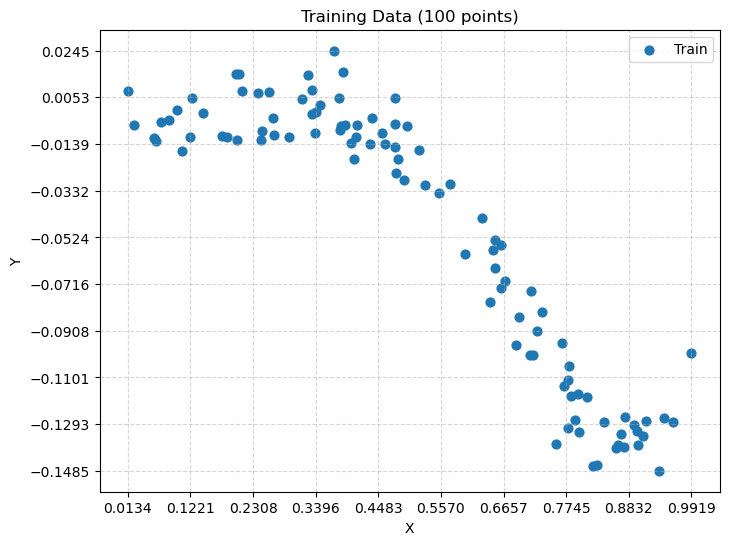

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_xy(path):
    # First try reading with a header
    df = pd.read_csv(path, sep=r"\s+", engine="python")
    # Normalize possible quoted headers like '"X"'
    df.columns = [c.strip().strip('"') for c in df.columns]
    if not {"X","Y"}.issubset(df.columns) or df.shape[1] != 2:
        # Fallback: no header present to set names
        df = pd.read_csv(path, sep=r"\s+", engine="python", header=None, names=["X","Y"])
    # Ensure numeric
    df["X"] = pd.to_numeric(df["X"], errors="coerce")
    df["Y"] = pd.to_numeric(df["Y"], errors="coerce")
    return df.dropna(subset=["X","Y"]).reset_index(drop=True)

train = load_xy("nonlintrain.txt")
test  = load_xy("nonlintest.txt")

# Scatter plot 
plt.figure(figsize=(8,6))
plt.scatter(train["X"], train["Y"], s=40, label="Train")
plt.xlabel("X"); plt.ylabel("Y"); plt.title("Training Data (100 points)")
plt.legend()
plt.xticks(np.linspace(train["X"].min(), train["X"].max(), 10))
plt.yticks(np.linspace(train["Y"].min(), train["Y"].max(), 10))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

We plotted the 100 training data points \((x_i, y_i)\) to get an idea of the trend.

**Observations:**
- The relationship between X and Y is clearly nonlinear.  
- At small values of X, Y fluctuates near zero.  
- As X increases toward the middle range, Y starts to decrease more rapidly.  
- Toward higher values of X, the downward trend continues, showing a curved, nonlinear shape.  
- The scatter suggests that a simple linear regression would not be appropriate.
- Looks like a more flexible model such as kernel regression is needed to capture the structure.

#### (d) Kernel Regression with Different Bandwidths

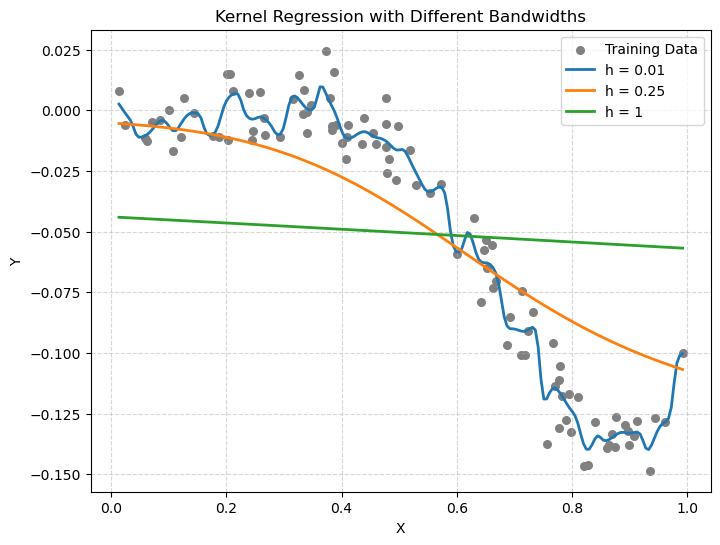

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian kernel regression
def kernel_regression(x_train, y_train, x_eval, h):
    # Pairwise distance between eval points and train points
    dists = (x_eval[:, None] - x_train[None, :]) / h
    weights = np.exp(-0.5 * dists**2)
    weights /= weights.sum(axis=1, keepdims=True)
    return weights.dot(y_train)

# Prepare evaluation grid
x_eval = np.linspace(train["X"].min(), train["X"].max(), 200)

plt.figure(figsize=(8,6))
plt.scatter(train["X"], train["Y"], c="gray", s=30, label="Training Data")

# Try different bandwidths
for h in [0.01, 0.25, 1]:
    y_pred = kernel_regression(train["X"].values, train["Y"].values, x_eval, h)
    plt.plot(x_eval, y_pred, lw=2, label=f"h = {h}")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Kernel Regression with Different Bandwidths")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

We fitted a Gaussian kernel regression to the training data using three different 
bandwidth values: **0.01**, **0.25** and **1**. The estimated regression curves were 
plotted on top of the training scatter plot.

**Observations:**
- **h = 0.01**: The curve is extremely wiggly, almost interpolating the noise in the data.  
  This shows **overfitting** (very high variance).
- **h = 0.25**: The curve is smooth and follows the underlying nonlinear pattern well.  
  This seems to balance bias and variance.
- **h = 1**: The curve is almost flat, missing important variations in the data.  
  This shows **underfitting** (very high bias).

Hence, smaller bandwidth values capture fine details but risk overfitting, while larger 
bandwidth values smooth too much and lose structure.

#### (e) Effect of Bandwidth Going to 0

By inspection, as the bandwidth parameter (h to 0):

- The kernel regression fit hugs every training point.  
- The curve becomes very wiggly and noisy in the data.
- This leads to overfitting, the variance of the model becomes very high, while its ability to generalize to new data points decreases.   

#### (f) Predictive Performance on Test Set

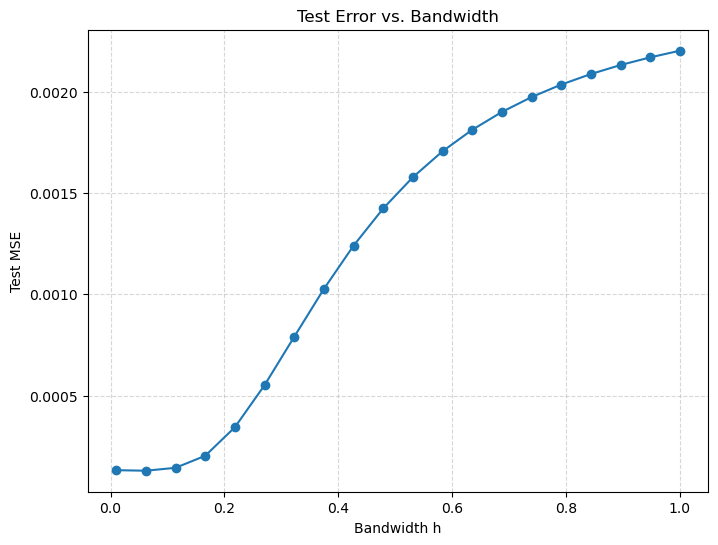

In [79]:
# Bandwidth values
hs = np.linspace(0.01, 1, 20)

test_errors = []
for h in hs:
    y_pred = kernel_regression(train["X"].values, train["Y"].values,
                               test["X"].values, h)
    mse = np.mean((test["Y"].values - y_pred)**2)
    test_errors.append(mse)

# Plot test error curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(hs, test_errors, marker="o")
plt.xlabel("Bandwidth h")
plt.ylabel("Test MSE")
plt.title("Test Error vs. Bandwidth")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

 The test error curve is **U-shaped**:

- For very small bandwidth values ($h \approx 0.01$), the test error is already low, but 
as $h$ decreases further the fit becomes too wiggly and unstable.  
- As bandwidth increases ($h > 0.2$), the test error rises steadily.  
- For large bandwidths ($h \approx 1$), the kernel regression severely underfits, 
leading to high bias and high test error.  

Hence, the model achieves the lowest test error at a small but nonzero bandwidth $\hat{h}$, 
balancing variance and bias. This confirms the expected **bias–variance tradeoff**.

#### (g) Optimal Bandwidth and Model Fit

Optimal bandwidth (h*): 0.06210526315789474
Associated test MSE: 0.00012923819599820201


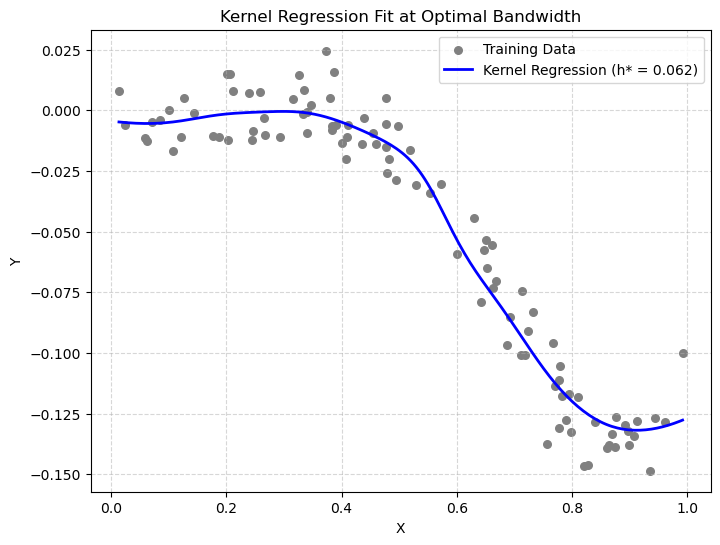

In [81]:
# Find optimal bandwidth
best_h = hs[np.argmin(test_errors)]
best_err = np.min(test_errors)

print("Optimal bandwidth (h*):", best_h)
print("Associated test MSE:", best_err)

# Fit kernel regression with best bandwidth
x_eval = np.linspace(train["X"].min(), train["X"].max(), 200)
y_best = kernel_regression(train["X"].values, train["Y"].values, x_eval, best_h)

# Plot training points and best fit
plt.figure(figsize=(8,6))
plt.scatter(train["X"], train["Y"], c="gray", s=30, label="Training Data")
plt.plot(x_eval, y_best, "b-", lw=2, label=f"Kernel Regression (h* = {best_h:.3f})")
plt.xlabel("X"); plt.ylabel("Y")
plt.title("Kernel Regression Fit at Optimal Bandwidth")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

From the test error curve, the optimal bandwidth was found to be:

- $\hat{h} \approx 0.062$  
- Associated test error: $\text{MSE} \approx 0.000129$  

**Observations:**
- At $\hat{h}$, the curve follows the main nonlinear trend in the data.  
- It avoids overfitting noise (like very small bandwidths) and also avoids oversmoothing (like very large bandwidths).  

Yes, the fit at $\hat{h}$ matches what we see from the test error: it gives a good balance between bias and variance.